In [158]:
# Primero importamos las librerias necesarias para el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importamos la base de datos y creamos un dataframe llamado "indice"
indice = pd.read_csv('/content/IMM_2020csv.csv')

# Mostramos algunos datos estadisticos generales del dataframe
indice.describe(include = 'all')
 
# Podemos observar que se encuentran los 32 estados del pais y que se
# se consideran 2,328 municipios en todo el pais.
# En terminos generales, podemos destacar que la media de analfabetismo por
# municipio en el pais es de 10.16 con una desviacion estandar de 7.6. Esto
# puede sugerir una sectorización del analfabetismo.

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
count,2469.000000,2469,2469.000000,2469,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469,2469.000000
unique,NaN,32,NaN,2328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Oaxaca,NaN,Benito Juárez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muy bajo,NaN
freq,NaN,570,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655,NaN
mean,19.215472,NaN,19324.164844,NaN,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,NaN,0.844869
std,7.367340,NaN,7382.892458,NaN,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,NaN,0.061140
min,1.000000,NaN,1001.000000,NaN,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,NaN,0.335198
25%,14.000000,NaN,14079.000000,NaN,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,NaN,0.811812
50%,20.000000,NaN,20226.000000,NaN,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,NaN,0.852196
75%,24.000000,NaN,24027.000000,NaN,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,NaN,0.887782


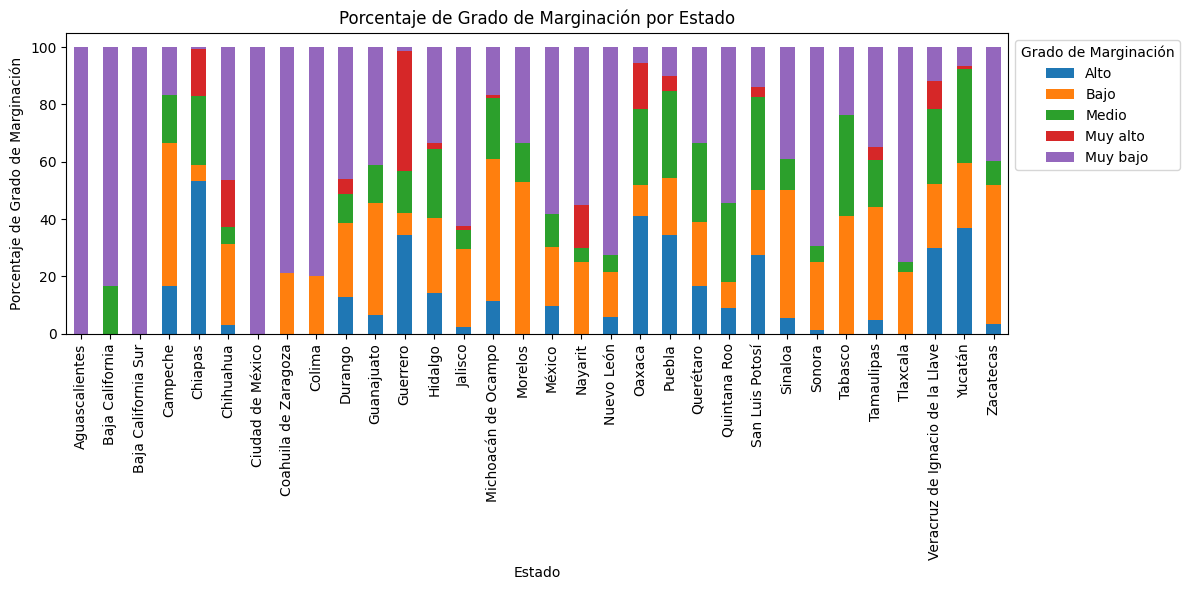

In [342]:
# Ahora hacemos un grafico del porcentaje de municipios con los diferentes niveles de indice de marginacion

# Primero hacemos un nuevo dataframe que incluya solo los valores de interes.
marg_por_estado = indice.loc[:, ['NOM_ENT', 'NOM_MUN', 'GM_2020']]
marg_por_estado

# Calculamos los porcentajes de cada grado de marginación por estado
porcentajes = marg_por_estado.groupby('NOM_ENT')['GM_2020'].value_counts(normalize=True).mul(100).unstack()
porcentajes

# Graficamos
ax = porcentajes.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.legend(title='Grado de Marginación', bbox_to_anchor=(1, 1))
ax.set_xlabel('Estado')
ax.set_ylabel('Porcentaje de Grado de Marginación')
ax.set_title('Porcentaje de Grado de Marginación por Estado')

# Ajustamos las etiquetas del eje x para mostrar solo los nombres de los estados
x_labels = porcentajes.index
ax.set_xticklabels(x_labels, rotation=90)

# Guardamos la grafica en .png y la mostramos
plt.tight_layout()
plt.savefig('Porcentaje de grado de marginacion por estado.png', dpi=300, bbox_inches='tight')
plt.show()



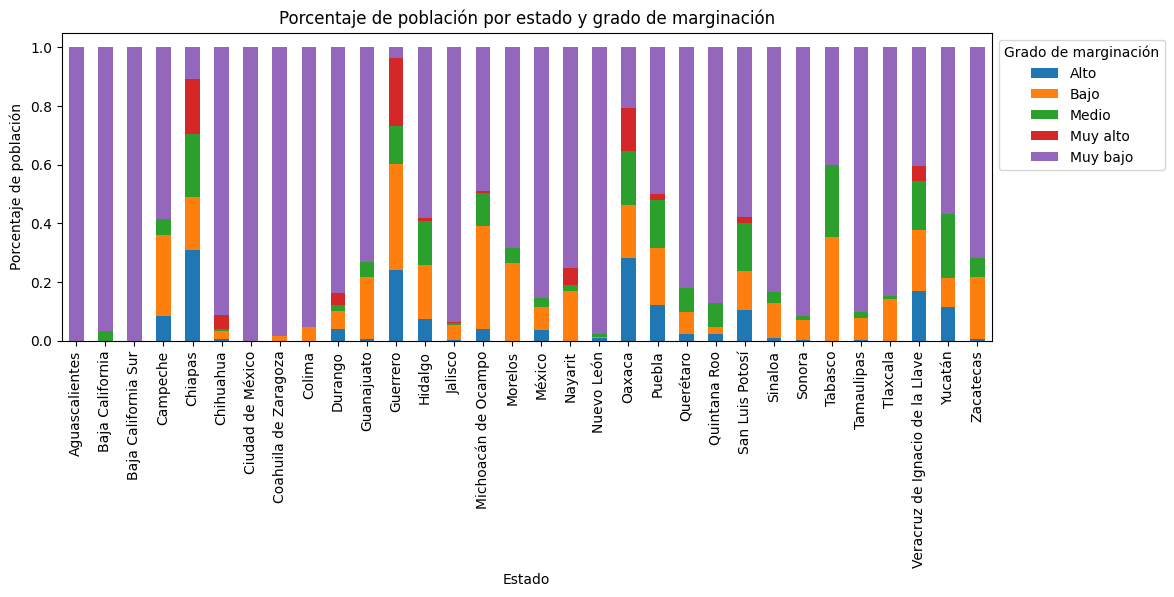

In [427]:
# Primero hacemos un nuevo dataframe que incluya solo los valores de interes.
poblacion = indice.loc[:, ['POB_TOT', 'NOM_ENT', 'NOM_MUN', 'GM_2020']]
poblacion

# Calculamos el porcentaje de población por estado y grado de marginación
poblacion['porcentaje_poblacion'] = poblacion['POB_TOT'] / poblacion.groupby('NOM_ENT')['POB_TOT'].transform('sum')
porcentaje_marginacion = poblacion.groupby(['NOM_ENT', 'GM_2020'])['porcentaje_poblacion'].sum().unstack()

# Graficamos
fig, ax = plt.subplots(figsize=(12, 4))
porcentaje_marginacion.plot(kind='bar', stacked=True, ax=ax)

# Etiquetamos
ax.set_xlabel('Estado')
ax.set_ylabel('Porcentaje de población')
ax.set_title('Porcentaje de población por estado y grado de marginación')
ax.legend(title='Grado de marginación', bbox_to_anchor=(1, 1), loc='upper left')

# Guardamos la grafica en .jpg y la mostramos
plt.savefig('Porcentaje de poblacion por estado y grado de marginacion.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [348]:
# ¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.

# Al comparar las graficas, se observa que aunque un estado puede tener distintos grados de marginación,
# la población con menor grado de marginación tiene mayor fuerza sobre la población total.
# Esto se puede traducir como que vive más gente en los municipios con menor grado de marginación.
# Usualmente las ciudades son las que tienen una mayor población en un estado, otros municipios
# rurales tiene una menor concentración de gente.

# Se puede concluir que las zonas rurales del pais son las que tienen un mayor grado de marginación.

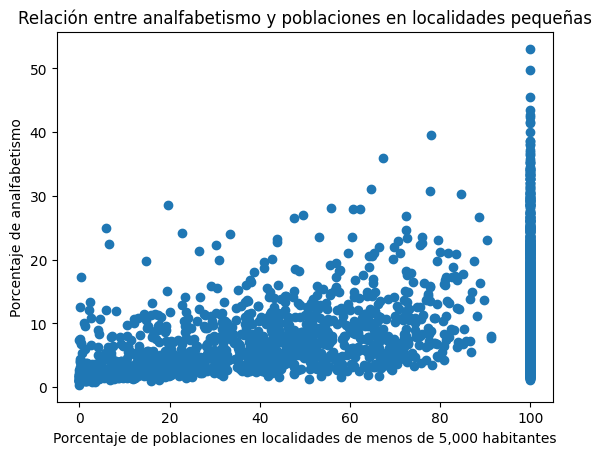

In [437]:
# Para graficar la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.

# Hacemos una grafica de puntos
plt.plot(indice['PL.5000'], indice['ANALF'], 'o')

# Etiquetamos
plt.title('Relación entre analfabetismo y poblaciones en localidades pequeñas')
plt.xlabel('Porcentaje de poblaciones en localidades de menos de 5,000 habitantes')
plt.ylabel('Porcentaje de analfabetismo')

plt.show()

In [431]:
# Parece que existe una muy leve relación entre estos dos indices, puede observarse un ligero incremento
# en la disperción de los puntos conforme aumenta el porcentaje de poblaciones pequeñas.
# Hay municipios pequeños que su totalidad de población entra en este indice de poblaciones pequeñas,
# pero esto no orienta directamente a que hay más analfabetismo solo por ser pequeñas como
# se observa en la linea vertical de la derecha.

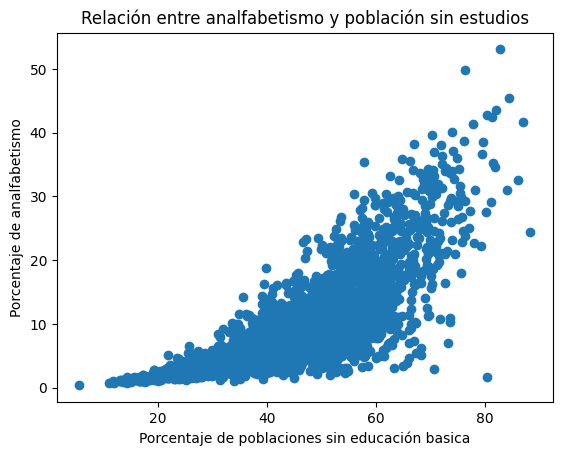

In [457]:
# Para encontrar una variable que tenga más conexion con el indice de analfabetismo,
# es necesario graficar de la misma manera la relación con las otras variantes de los indices de marginación.

# Se encontro que el porcentaje de población de 15 años o más sin educación básica
# se relaciona más con el grado de analfabetismo, relación que es bastante logica.
plt.plot(indice['SBASC'], indice['ANALF'], 'o')
plt.title('Relación entre analfabetismo y población sin estudios')
plt.xlabel('Porcentaje de poblaciones sin educación basica')
plt.ylabel('Porcentaje de analfabetismo')

plt.show()

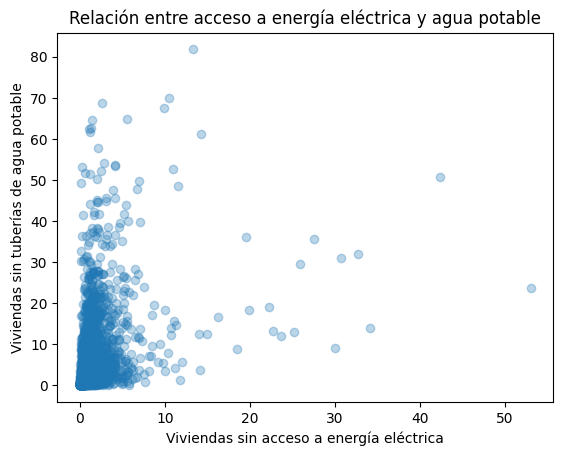

In [517]:
# Un indicador interesante podria ser si existe relación entre el acceso a la energia electrica
# y el acceso a tuberias de agua. Esto puede demostrar si hay correlación entre estas
# dos variables.

# Obtenemos el nuevo dataframe con estas dos variables
indicador = indice.loc[:, ['OVSEE', 'OVSAE']]
indicador

# Lo guardamos en formato parquet
indicador.to_parquet(r'C:\Users\Julio\Downloads\indicador.parquet')

# Graficamos las dos variables
plt.scatter(indice['OVSEE'], indice['OVSAE'], alpha=0.3)

# Etiquetamos
plt.xlabel('Viviendas sin acceso a energía eléctrica')
plt.ylabel('Viviendas sin tuberías de agua potable')

# Título del gráfico
plt.title('Relación entre acceso a energía eléctrica y agua potable')

# Mostrar el gráfico
plt.show()
